In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
test_df = pd.read_csv("~/real_estate/data/v4/final/yelp/yelp_test_df.csv")
train_df = pd.read_csv("~/real_estate/data/v4/final/yelp/yelp_train_df.csv")

yelp_features = ["mean_rating","mean_rating_mo","mean_rating_yr","review_count","review_count_mo",
                 "review_count_yr","restaurant_review_count","restaurant_review_count_mo",
                 "restaurant_review_count_yr","bar_review_count","bar_review_count_mo","bar_review_count_yr",
                 "coffee_review_count","coffee_review_count_mo","coffee_review_count_yr","price_2_review_count",
                 "price_2_review_count_mo","price_2_review_count_yr","price_3_review_count",
                 "price_3_review_count_mo","price_3_review_count_yr"]

train_df = train_df.drop(yelp_features, axis=1)

features = train_df.columns[:-2]

X_test = test_df[features].values
X_train = train_df[features].values
y_test = test_df["target"].values
y_train = train_df["target"].values

### Train Linear Regressions

In [5]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_test_hat = model_1.predict(X_test)
y_train_hat = model_1.predict(X_train)
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat)[0,1]))

R^2 train:  0.48099478793385675
R^2 test:  0.3128603454984104


### Plot Results

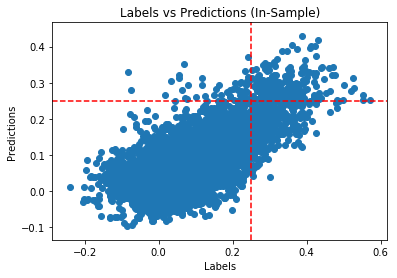

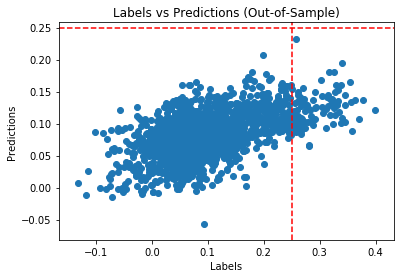

In [8]:
plt.scatter(y_train, y_train_hat)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

### Get Coefficients

In [9]:
model = sm.OLS(y_train, X_train)
model = model.fit()

coefficients = model.params
standard_errors = model.HC0_se

regression_table = pd.DataFrame({"coefficients":coefficients, 
                                 "standard_errors":standard_errors}, index=features)

In [10]:
regression_table

,coefficients,standard_errors
90_day_treasury_bill_rate,0.019135,0.007325
mean_adjusted_income_lag_log,-0.152882,0.027017
mean_adjusted_income_with_dep_lag_log,0.151867,0.025721
mean_fixed_mortgage_rate,0.005779,0.005717
mean_hourly_earnings_adj,-0.082755,0.095807
mean_mortgage_interest_hh_lag_log,0.121688,0.009694
mean_real_estate_taxes_hh_lag_log,-0.082736,0.008566
median_sqft_value_log,-0.013254,0.018948
month,-0.018259,0.016868
people_count_lag_log,0.020568,0.003550
